In [1]:
import tensorflow as tf
import tflearn
from math import ceil
from tflearn.layers.core import input_data
from tflearn.layers import conv_2d,max_pool_2d,local_response_normalization,regression


In [2]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap']='gray'
import skimage.color as color


In [3]:
def read_images(fp=None):
    f=[]
    if fp==None:
       file_path="./Opencountry/";
    else:
       file_path=fp;  
    
    f=os.listdir(file_path);
    #print("File list: ",f);
    return f

In [4]:
files=read_images()
files=files[1:]
#print files

In [5]:
def load_images(f):
    images=np.zeros((len(f),224,224,3));
    bw=np.zeros((len(f),224,224));
    tfs=np.empty((224,224,3))
    #print tfs
    tfs.fill(256)
    #print tfs
    basewidth = 224;
    filepath="./Opencountry/";
    for im_num,im_name in enumerate(f):
        #print(filepath,im_name);
        img = Image.open(filepath+im_name);
        #wpercent = (basewidth/float(img.size[0]))
        #hsize = int((float(img.size[1])*float(wpercent)))
        img = img.resize((basewidth,basewidth))#, PIL.Image.ANTIALIAS)
        images[im_num]=tfs-img;
        #print img
        bwimg=Image.open(filepath+im_name).convert('L');
        bwimg = bwimg.resize((basewidth,basewidth))
        #print bwimg
        bw[im_num]=bwimg;
        #print(images[im_num,0:4,0:4]);
    return images,bw

In [6]:
images,bw=load_images(files)
print images.shape

(410, 224, 224, 3)


In [7]:
def show_images(images):
    for im_num in [3]:#range(images.shape[0]):
        #im=images[im_num].transpose([1,2,0]);
        im=images[im_num]
        print(im.shape) 
        plt.imshow(im);
        plt.show();
        
def show_black_and_white(bw):
    for im_num in [3]:
        im=bw[im_num]
        plt.imshow(im.astype('uint8'))
        plt.show();

(224, 224, 3)


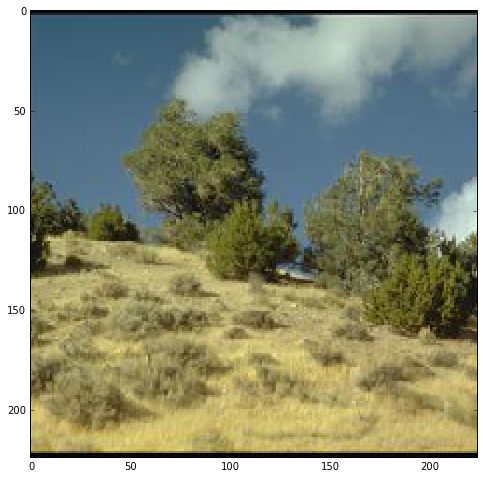

In [8]:
show_black_and_white(bw)
show_images(images)

In [9]:
class convert_images:
      def __init__(self):
          print("Convert images 1 or more.");

      def convert_rgb2lab(self,images):
          out=np.zeros_like(images);
          for num in range(images.shape[0]):
              im=images[num,:,:,:].transpose([1,2,0]);
              out[num]=color.rgb2lab(im).transpose([2,0,1]); #(0,2,1)           
          return out

      def convert_rgb2ycbcr(self,images):
          out=np.zeros_like(images);
          for num in range(images.shape[0]):
              im=images[num,:,:,:].transpose([1,2,0]);
              out[num]=color.rgb2ycbcr(im).transpose([2,0,1]);
          return out    
            
      def get_layers(self,image):
          return (image[0,:,:],image[1,:,:],image[2,:,:])


In [10]:
bw=bw.reshape(bw.shape[0],bw.shape[1],bw.shape[2],1)

In [11]:
print bw.shape

(410, 224, 224, 1)


In [12]:
print images.shape
images=np.reshape(images,(images.shape[0],images.shape[1]*images.shape[2]*images.shape[3]))
print images.shape

(410, 224, 224, 3)
(410, 150528)


In [13]:
images=np.reshape(images,(images.shape[0],1,1,images.shape[1]))
print images.shape

(410, 1, 1, 150528)


In [14]:
def show_bw_tensor(bw):
    for i in [3]:
        x=bw[i]
        plt.imshow(x[:,:,0])
        plt.show()

In [15]:
show_bw_tensor(bw)
print bw[0,:,:,0]

[[ 233.  232.  233. ...,  128.  132.  130.]
 [ 235.  238.  236. ...,  135.  134.  130.]
 [ 240.  238.  228. ...,  120.  126.  131.]
 ..., 
 [  98.   67.   61. ...,   35.   63.   24.]
 [ 107.   31.    9. ...,   27.   22.    9.]
 [  18.   42.   16. ...,    8.   18.   13.]]


In [16]:
print bw.shape
print images.shape

(410, 224, 224, 1)
(410, 1, 1, 150528)


In [17]:

network = input_data(shape=[None, 224, 224, 1])
print network.get_shape
network = conv_2d(network, 100, 3,  activation='relu')
print network.get_shape
network = max_pool_2d(network,4,2)
#network=tflearn.dropout(network,0.5)
network=local_response_normalization(network)
network = conv_2d(network, 100, 3, activation='relu')
print network.get_shape
network = max_pool_2d(network,4,2)
network=tflearn.dropout(network,0.5)
network=local_response_normalization(network)
network = conv_2d(network, 100, 3, activation='relu')
print network.get_shape
network = max_pool_2d(network,4,4)
#network=tflearn.dropout(network,0.5)
network=local_response_normalization(network)
network = conv_2d(network, 100, 3, activation='relu')
print network.get_shape
network = max_pool_2d(network,4,4)
#network=tflearn.dropout(network,0.5)
network=local_response_normalization(network)
network = conv_2d(network,150528 , 3, activation='relu')
print network.get_shape
network = max_pool_2d(network,4,4)
print network.get_shape
network = regression(network,optimizer='adam',loss='mean_square',learning_rate=0.001)


<bound method Tensor.get_shape of <tf.Tensor 'InputData/X:0' shape=(?, 224, 224, 1) dtype=float32>>
<bound method Tensor.get_shape of <tf.Tensor 'Conv2D/Relu:0' shape=(?, 224, 224, 100) dtype=float32>>
<bound method Tensor.get_shape of <tf.Tensor 'Conv2D_1/Relu:0' shape=(?, 112, 112, 100) dtype=float32>>
<bound method Tensor.get_shape of <tf.Tensor 'Conv2D_2/Relu:0' shape=(?, 56, 56, 100) dtype=float32>>
<bound method Tensor.get_shape of <tf.Tensor 'Conv2D_3/Relu:0' shape=(?, 14, 14, 100) dtype=float32>>
<bound method Tensor.get_shape of <tf.Tensor 'Conv2D_4/Relu:0' shape=(?, 4, 4, 150528) dtype=float32>>
<bound method Tensor.get_shape of <tf.Tensor 'MaxPool2D_4/MaxPool:0' shape=(?, 1, 1, 150528) dtype=float32>>


In [18]:
model = tflearn.DNN(network, tensorboard_verbose=2)
model.fit(bw[:310], images[:310], n_epoch=50, validation_set=0 ,shuffle=True,show_metric=True, batch_size=10, run_id='test')

Training Step: 1550  | total loss: 1180.93787
| Adam | epoch: 050 | loss: 1180.93787 - acc: 1.0000 -- iter: 310/310
Training Step: 1550  | total loss: 1180.93787
| Adam | epoch: 050 | loss: 1180.93787 - acc: 1.0000 -- iter: 310/310
--


In [19]:
#Load from checkpoint
#model = tflearn.DNN(network, tensorboard_verbose=2, checkpoint_path='logs/checkpoint')
#model.load('logs/checkpoint-52')

In [20]:
images=np.reshape(images,(410,224,224,3))
remimages=images[1:10]

In [21]:
def disp(sample,original):
    plt.imshow(sample)
    plt.show()
    plt.imshow(original)
    plt.show()


In [22]:
def get_random(n):
    val=np.random.randint(0,n)
    original=remimages[val]
    sample=y[val]
    return original,sample

In [23]:
x=model.predict(bw[1:10])
x=np.round(x)

In [24]:
y=np.array(x)
print x.shape
print y.shape
print images.shape

(9, 1, 1, 150528)
(9, 1, 1, 150528)
(410, 224, 224, 3)


In [25]:
y=np.reshape(x,(bw[1:10].shape[0],224,224,3))

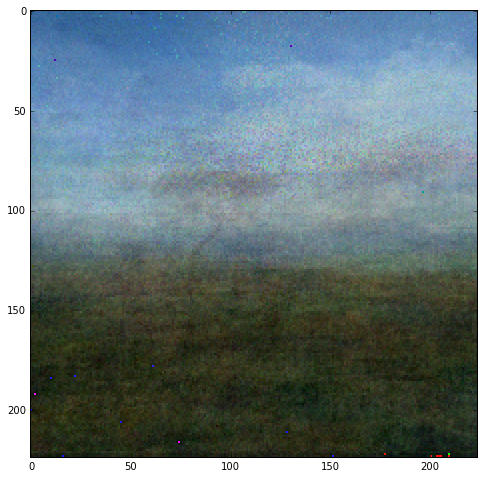

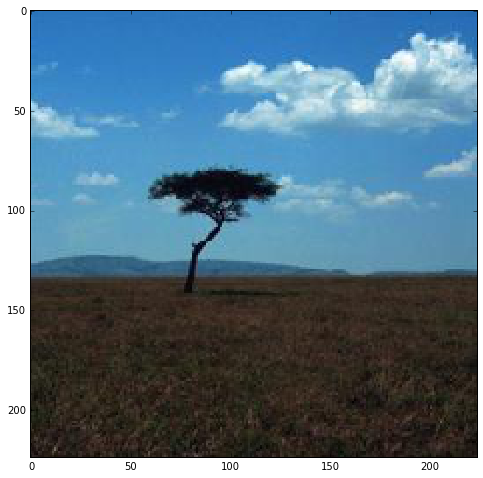

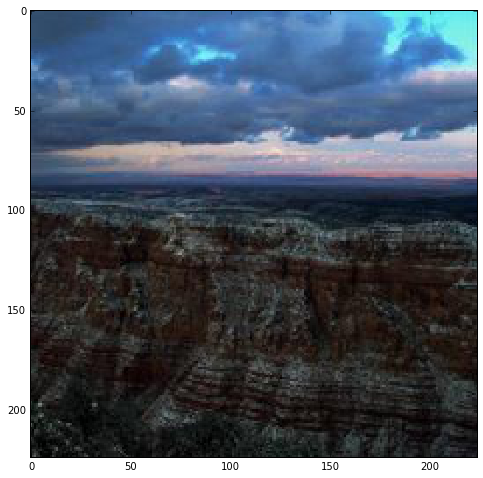

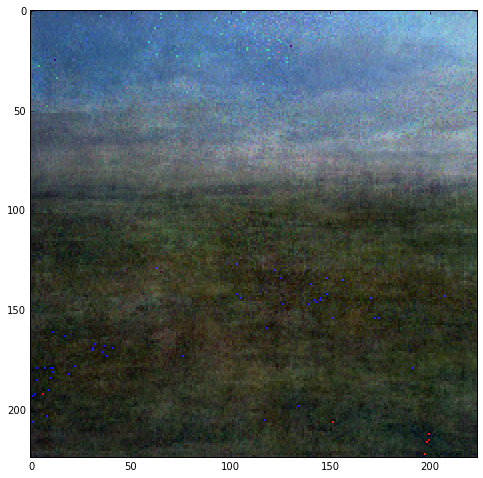

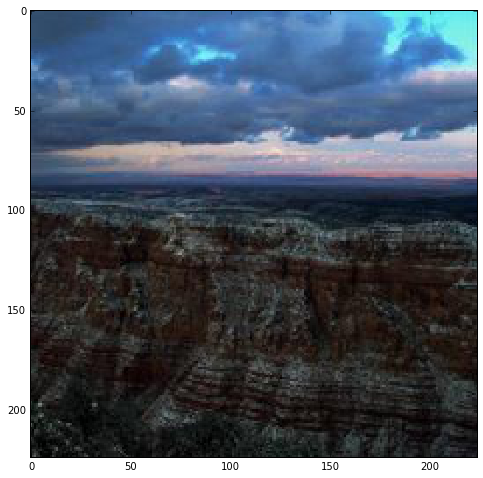

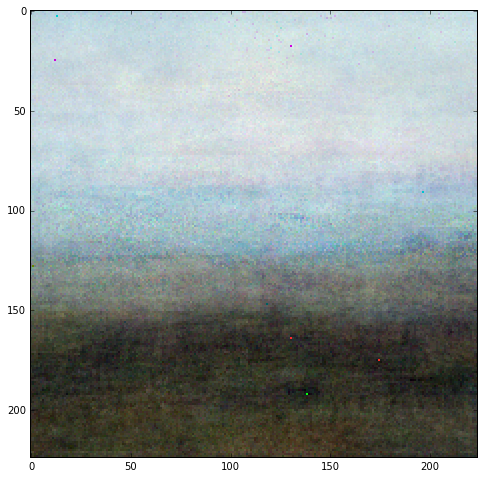

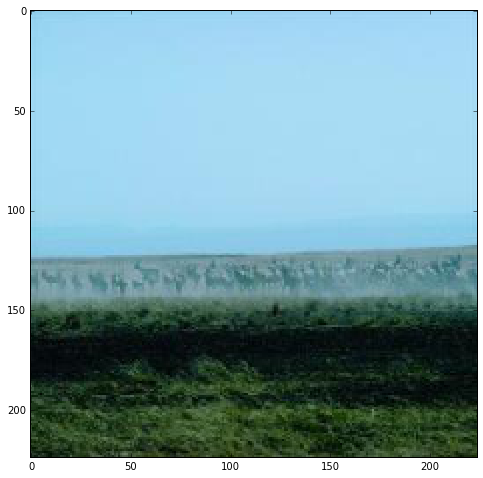

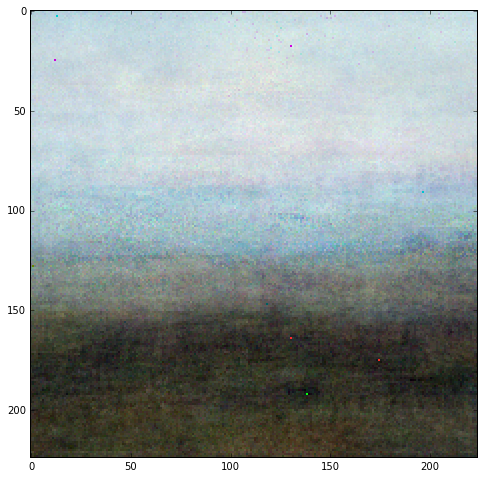

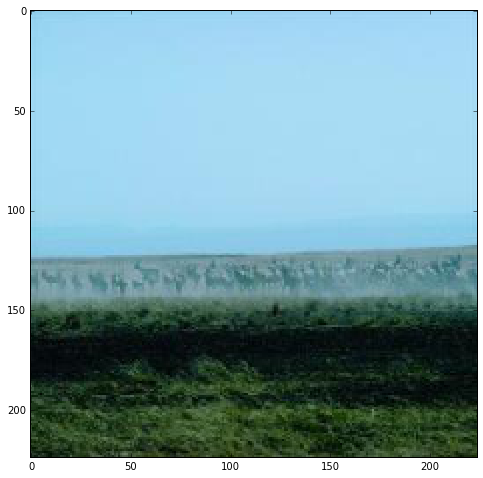

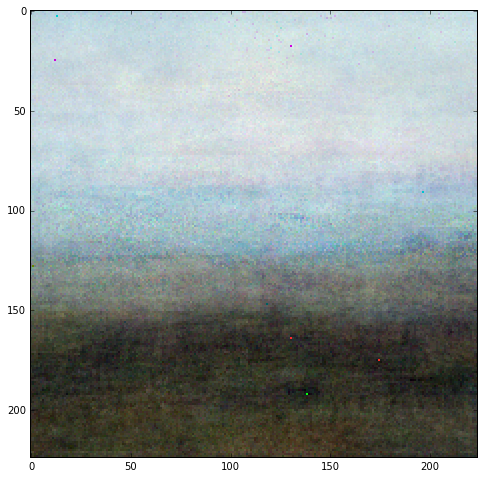

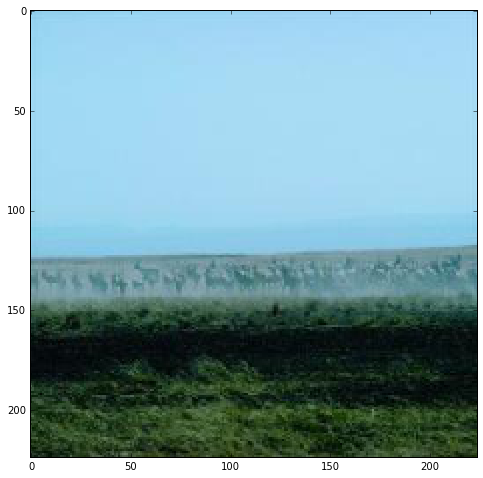

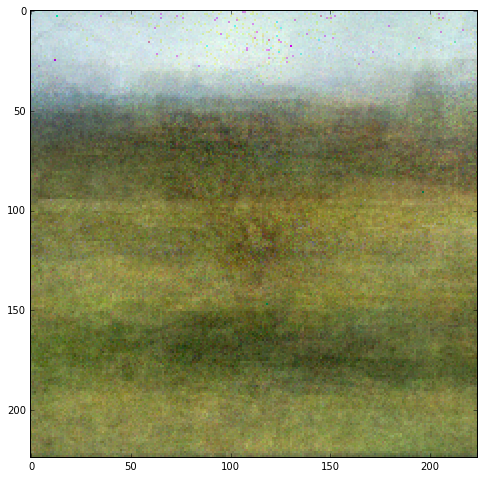

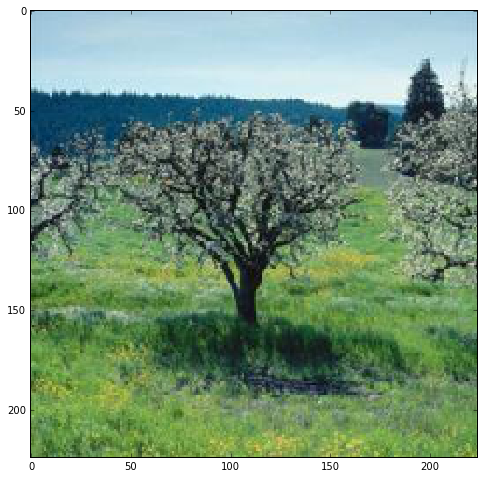

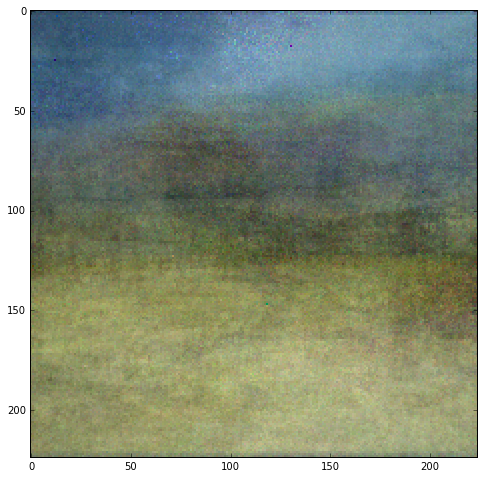

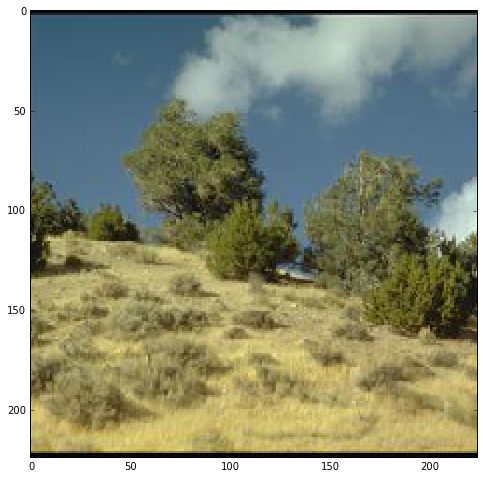

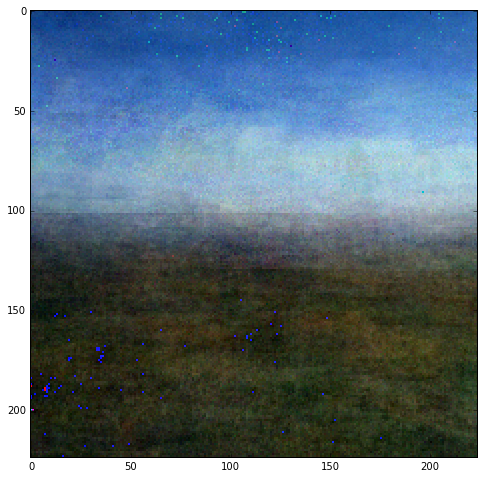

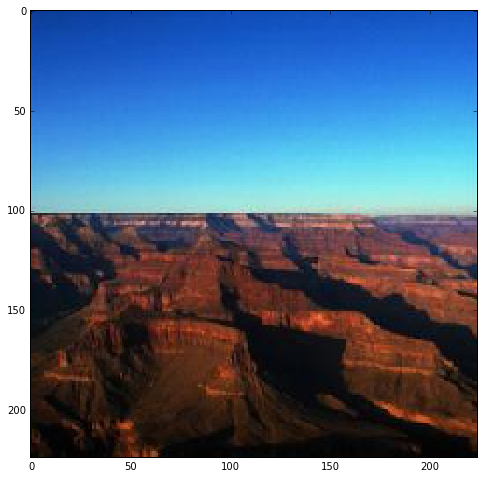

In [26]:
for i in range(9):
    original,sample=get_random(9)
    disp(sample,original)
    

In [27]:
remimages=images[361:]

In [30]:
x=model.predict(bw[361:])
x=np.round(x)
y=np.array(x)

(49, 224, 224, 3)


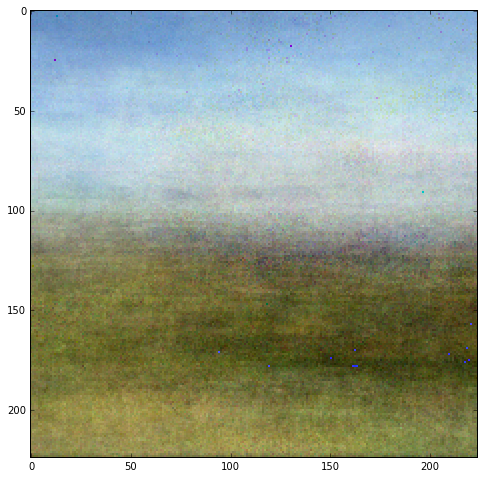

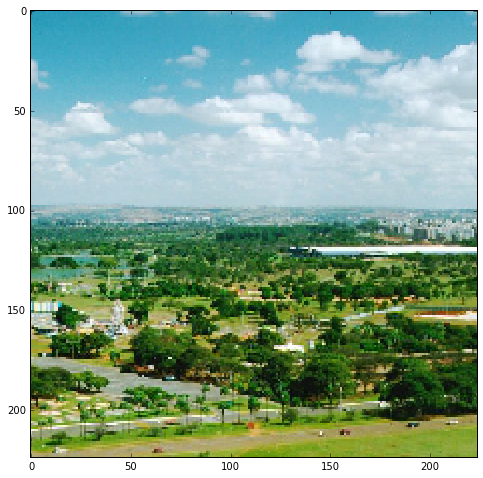

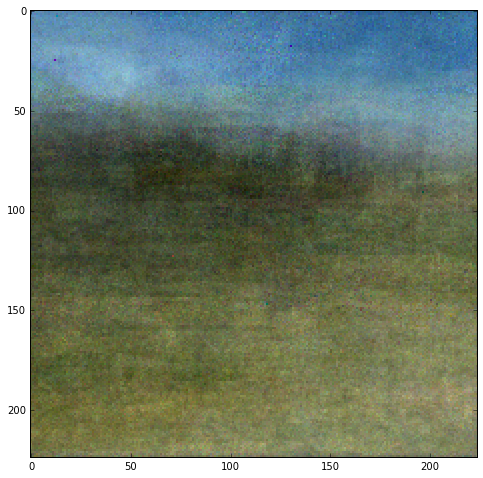

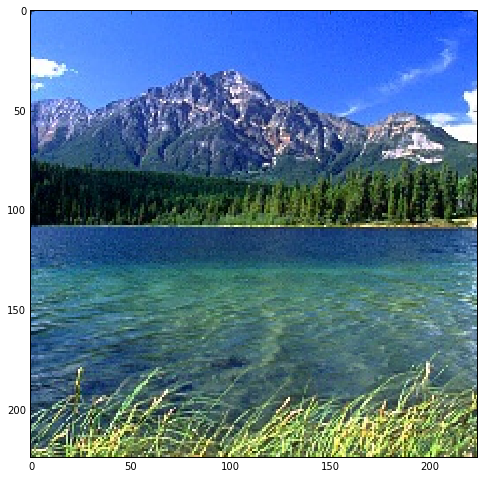

In [31]:
y=np.reshape(x,(bw[361:].shape[0],224,224,3))
print y.shape
for i in range(2):
    original,sample=get_random(bw[361:].shape[0])
    disp(sample,original)
    

In [32]:
model.save('modeldrop.tflearn')